Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)  
 - 1 -- building_windows_float_processed  
 - 2 --building_windows_non_float_processed  
 - 3 --vehicle_windows_float_processed  
 - 4 --vehicle_windows_non_float_processed (none in this database)  
 - 5 --containers  
 - 6 -tableware  
 - 7 --headlamps  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250

In [2]:
df = pd.read_csv('../Dataset/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA
- Performing EDA analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### <b>Observation</b>:
-   Dataset has no null-values
-   All the features are float type

In [4]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### **Observation**:
No null values

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())

RI: 178 unique values
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51

### Check and Remove duplicates

In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [10]:
df_initial_rows = df.shape[0]
df_initial_rows

213

In [11]:
def lost_data_percent():
    df_rows = df.shape[0]
    lost_data = df_initial_rows - df_rows
    print("Lost data percent ",round((lost_data/df_initial_rows)*100, 2))

## Visualizing Data

### Box Plot

In [12]:
def box_plot(df, rows, cols):
    rows = int(rows)
    cols = int(cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    for i in range(rows):
        for j in range(cols):
            sns.boxplot(data=df, x=df.columns[i + j], ax=axes[i, j])
    plt.tight_layout()
    plt.show()

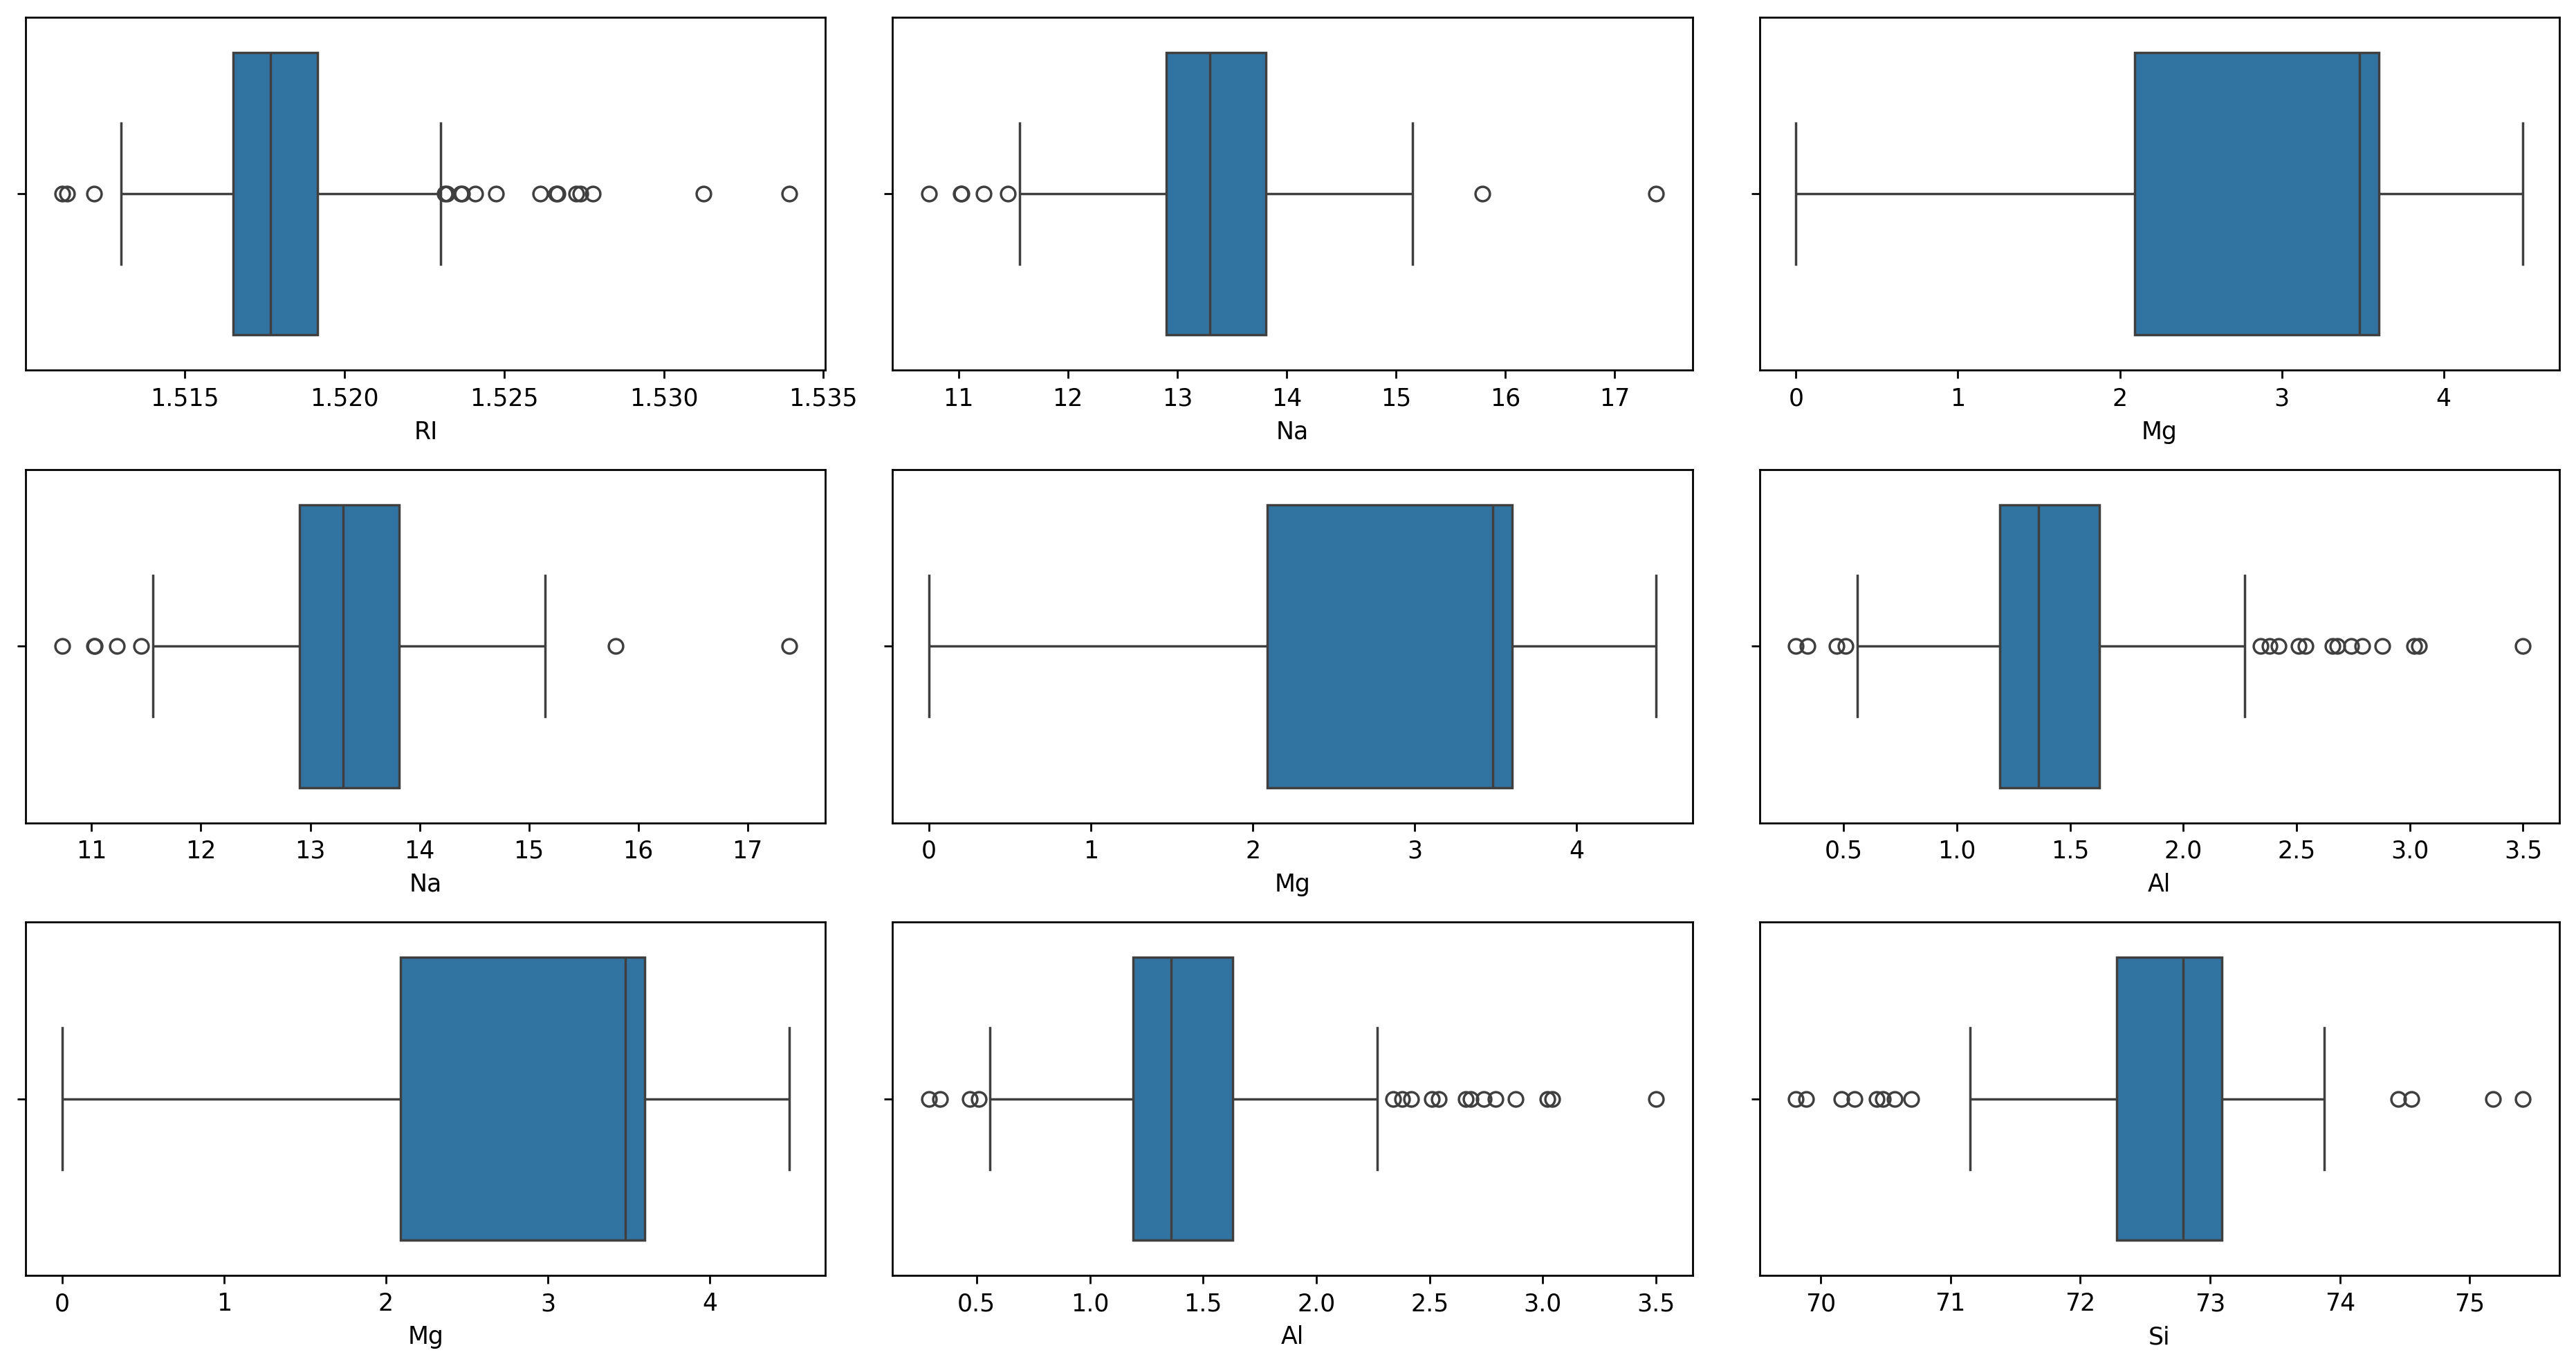

In [13]:
box_plot(df.drop('Type', axis=1), 3, 3)

### Hist plot

In [14]:
def hist_plot(df, rows, cols):
    rows = int(rows)
    cols = int(cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    for i in range(rows):
        for j in range(cols):
            sns.histplot(data=df, x=df.columns[i + j], ax=axes[i, j])
    plt.tight_layout()
    plt.show()

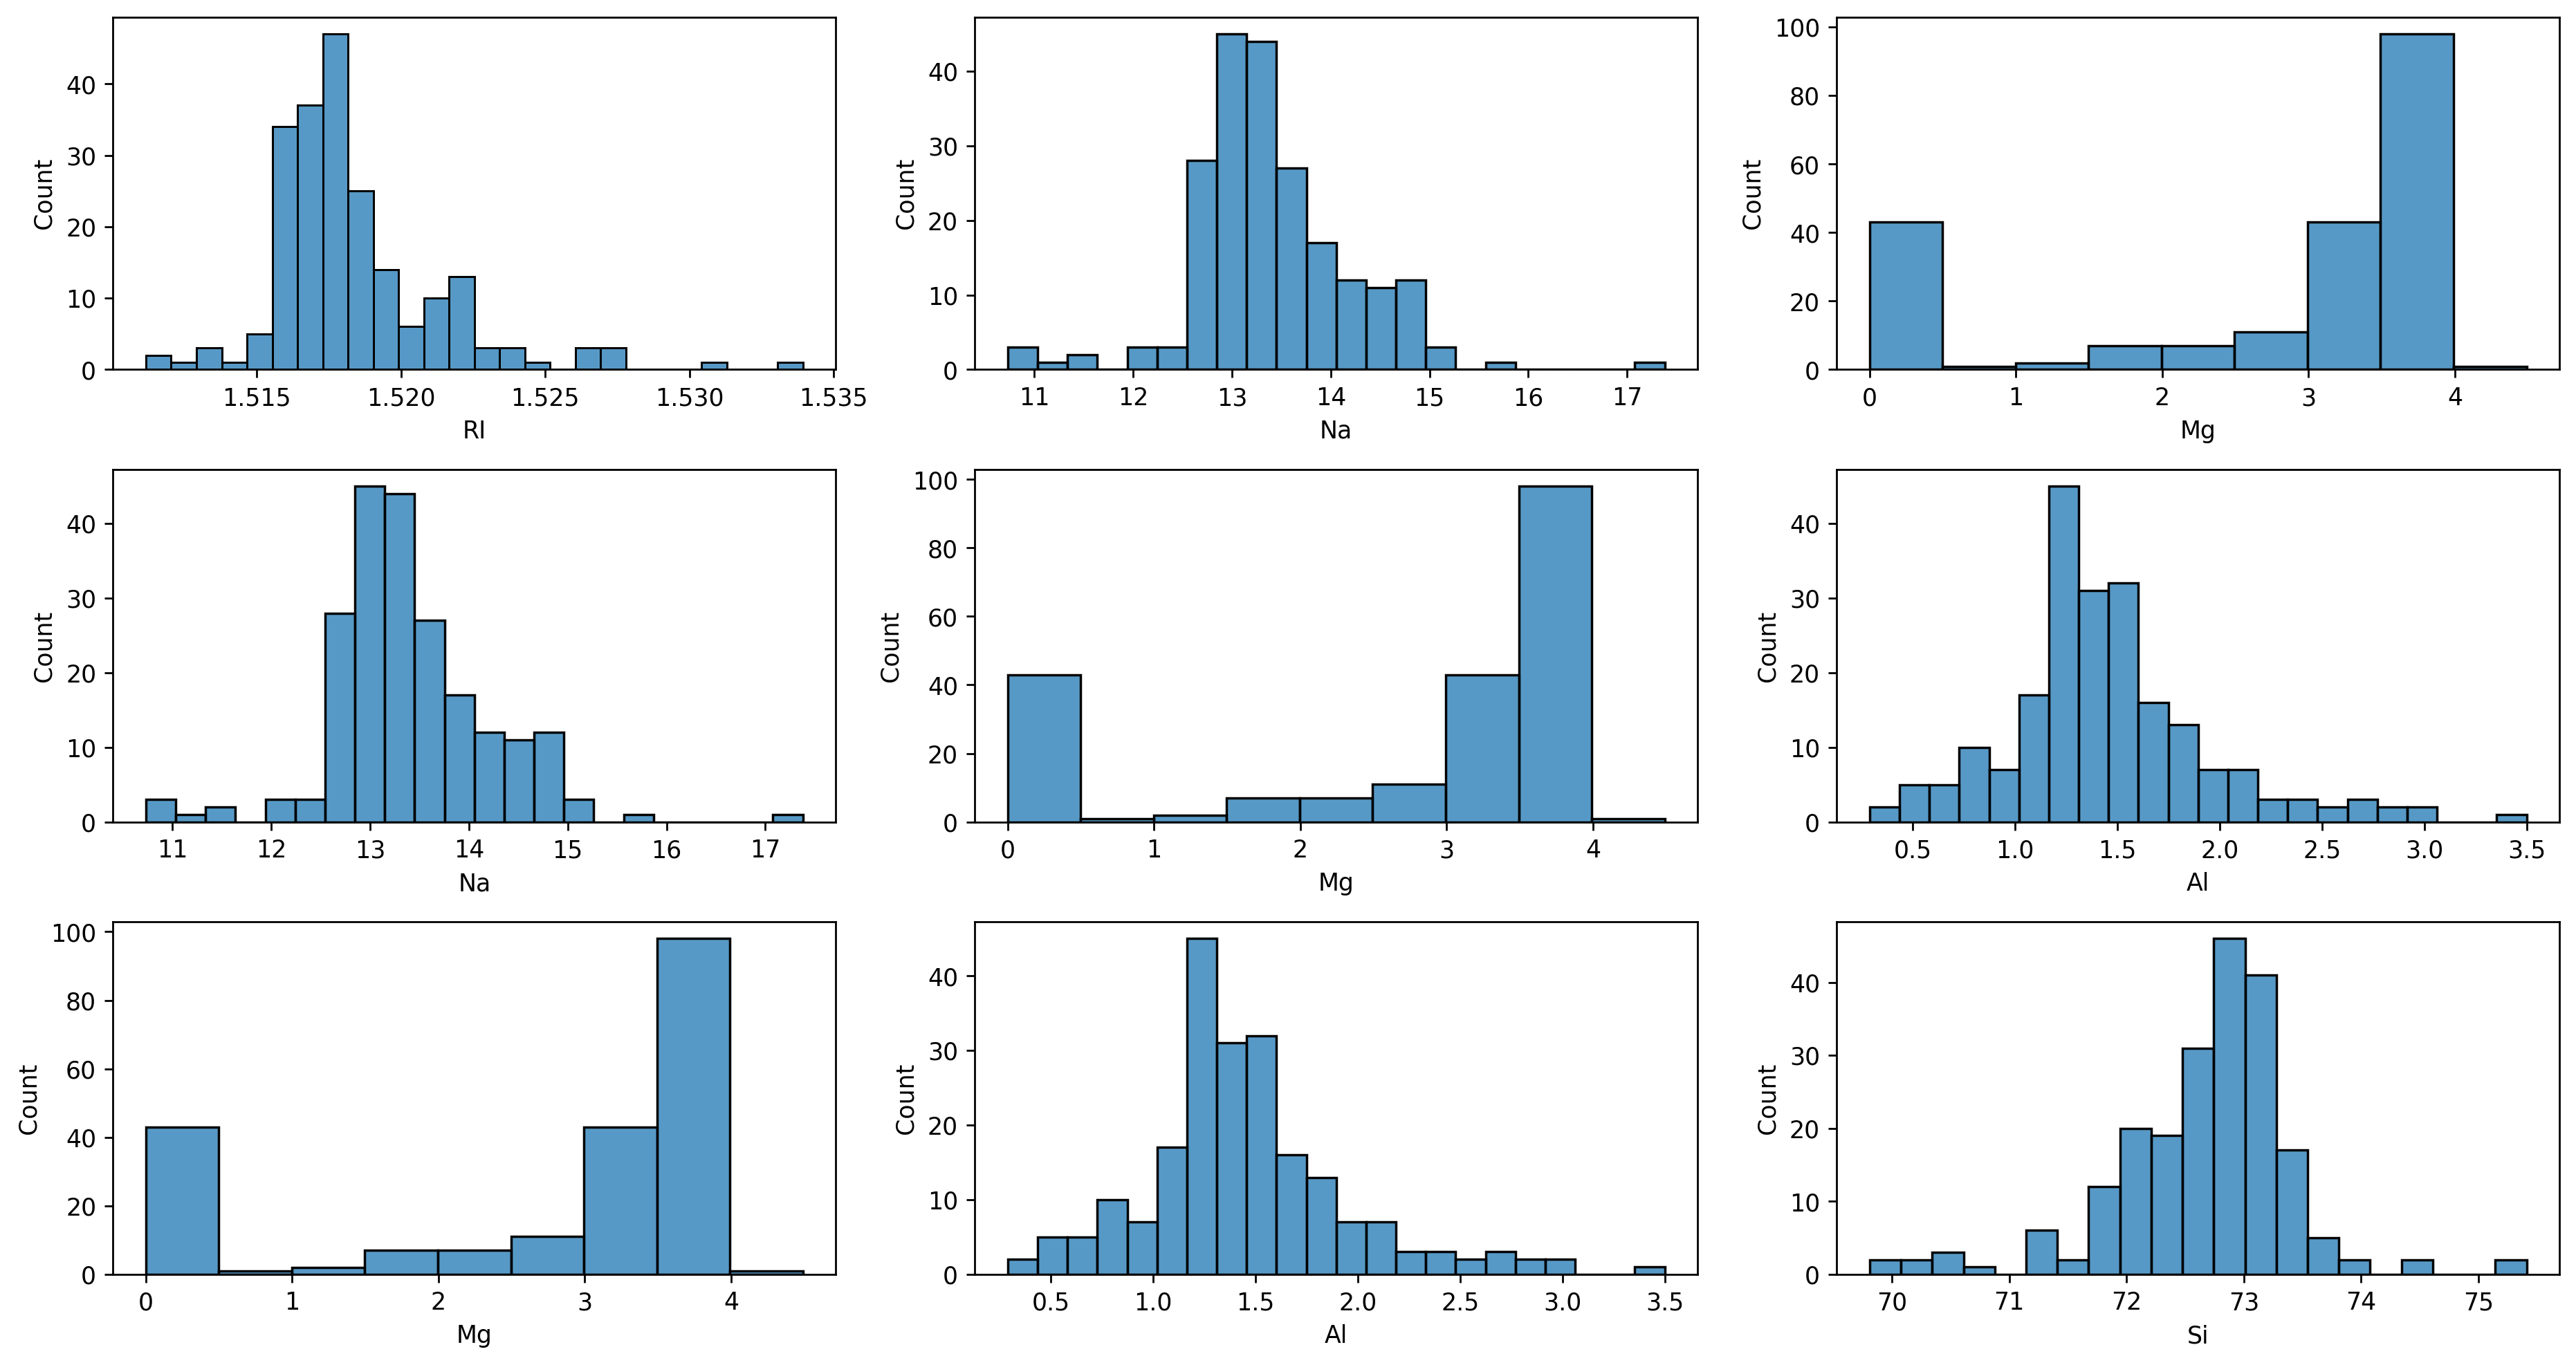

In [15]:
hist_plot(df.drop('Type', axis=1), 3, 3)

### Q-Q Plot

In [16]:
import statsmodels.api as sm

In [17]:
def qq_plot(df, rows, cols):
    rows = int(rows)
    cols = int(cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    for i in range(rows):
        for j in range(cols):
            sm.qqplot(df[df.columns[i+j]], ax = axes[i,j], line='q')
            axes[i, j].set_title(df.columns[i + j])
    plt.tight_layout()
    plt.show()

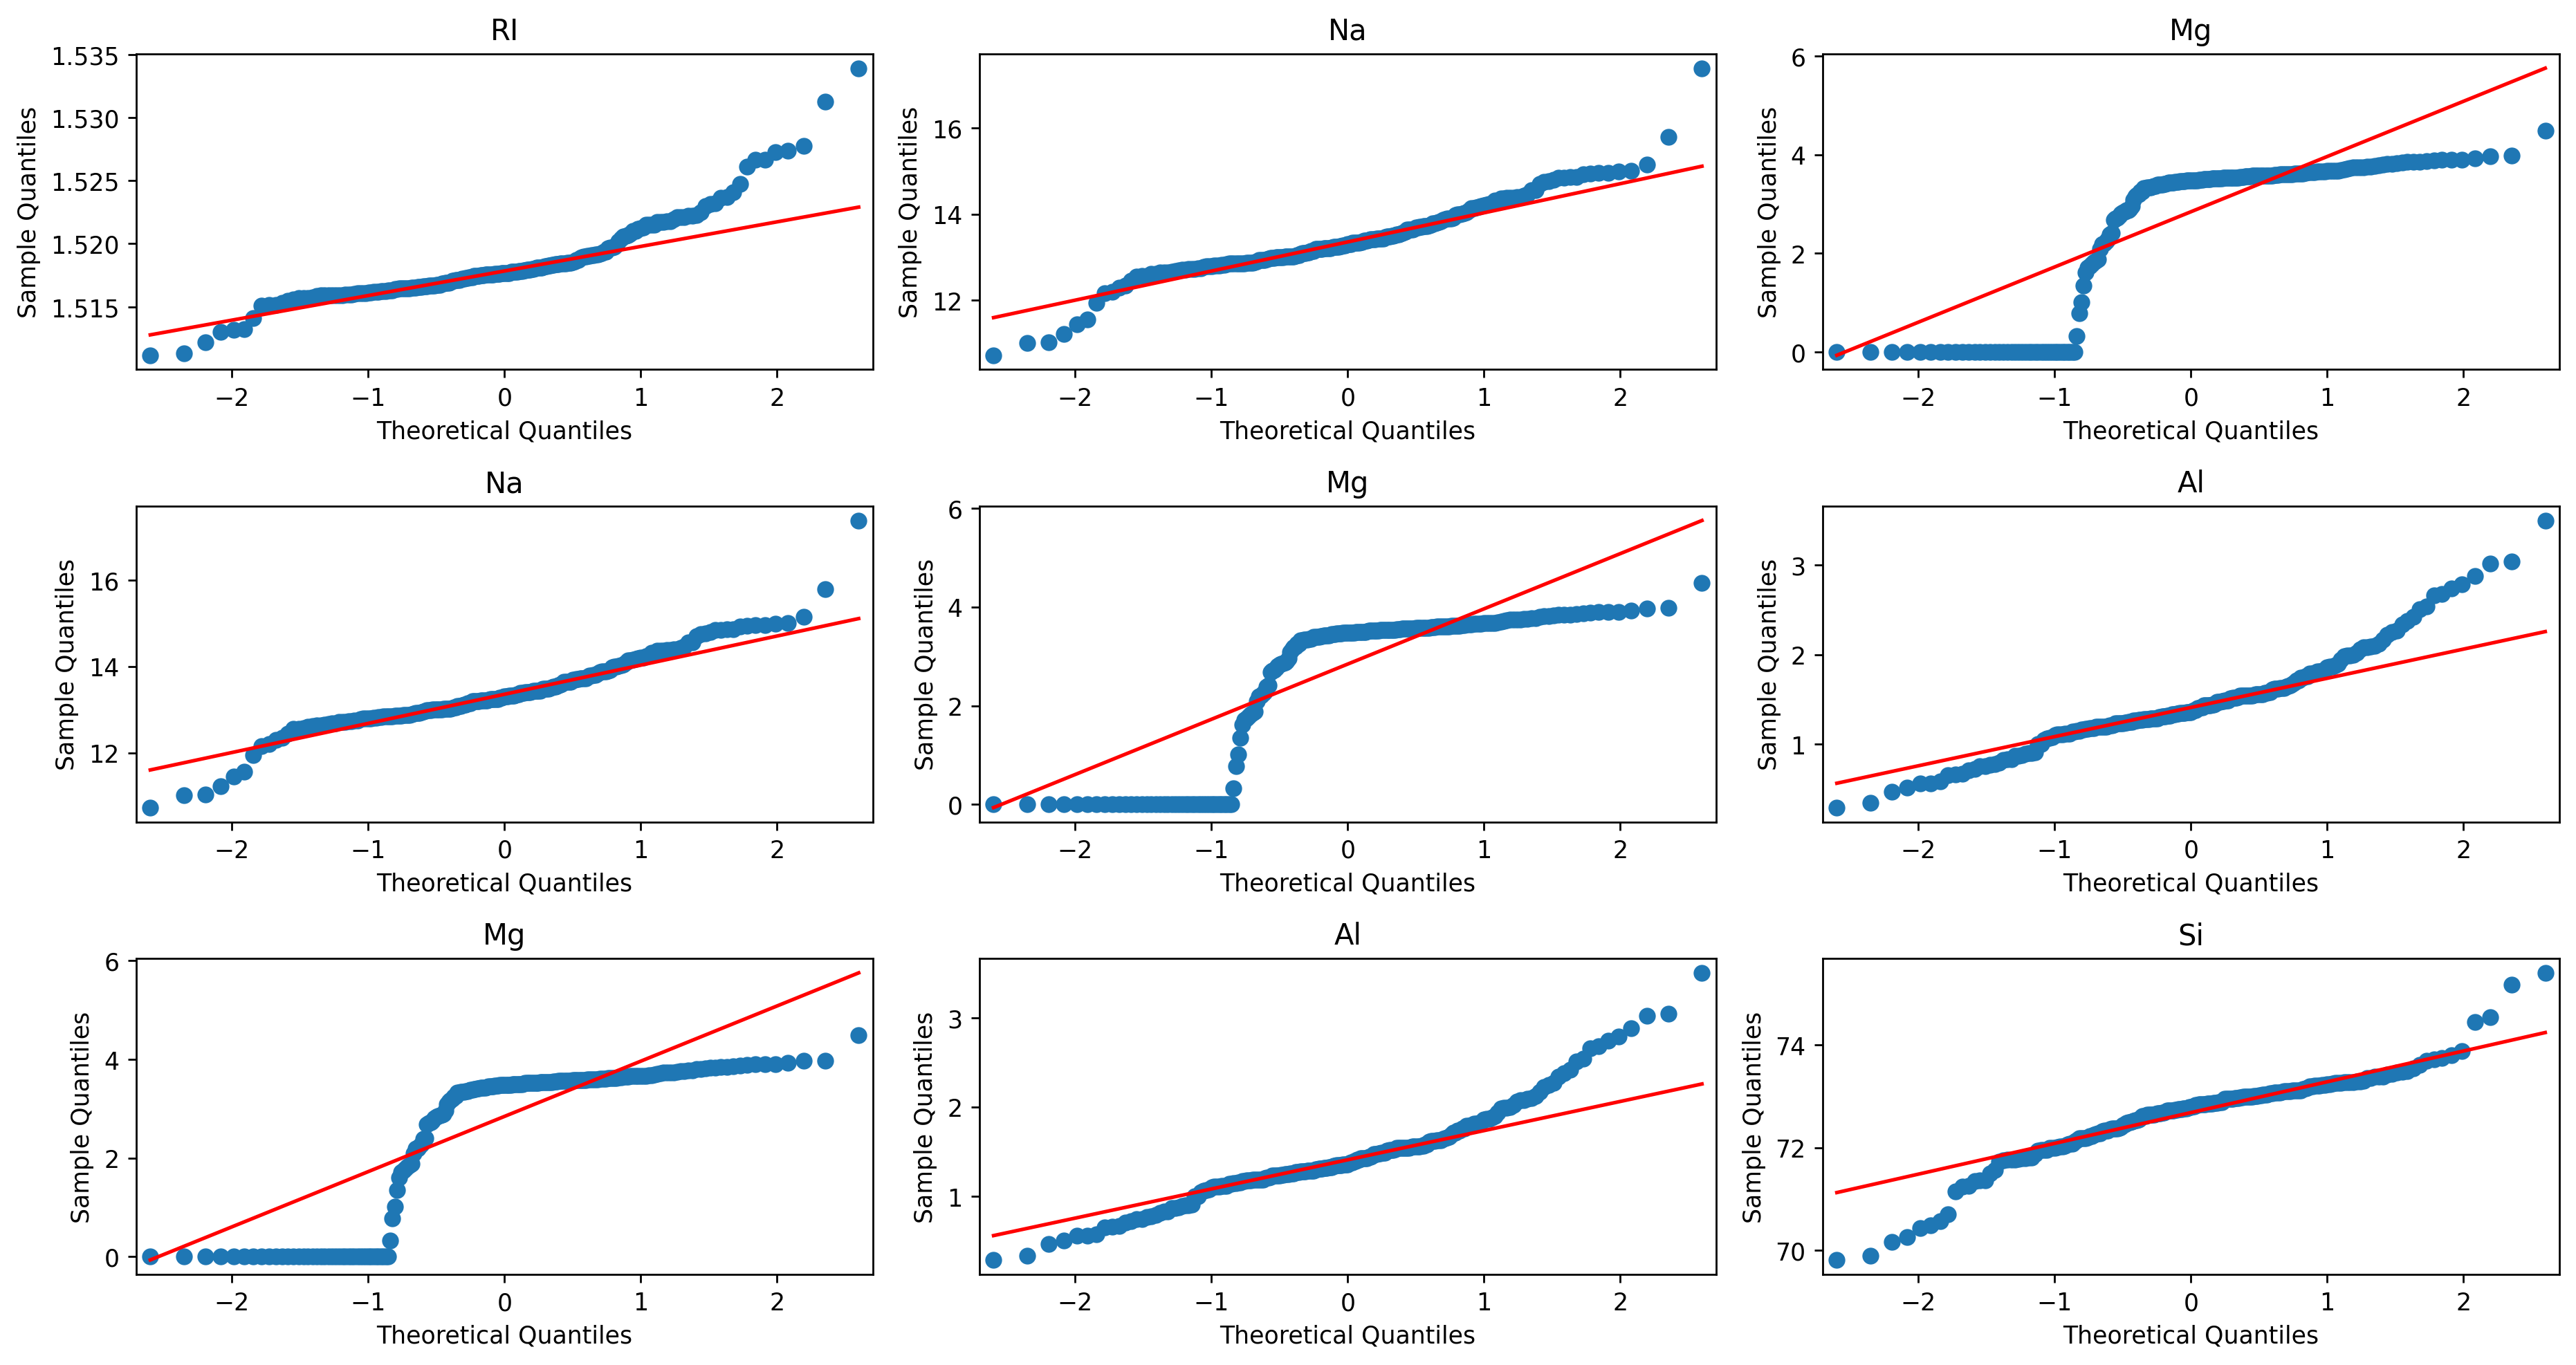

In [18]:
qq_plot(df.drop('Type', axis=1), 3, 3)

### Correlation Analysis

In [19]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


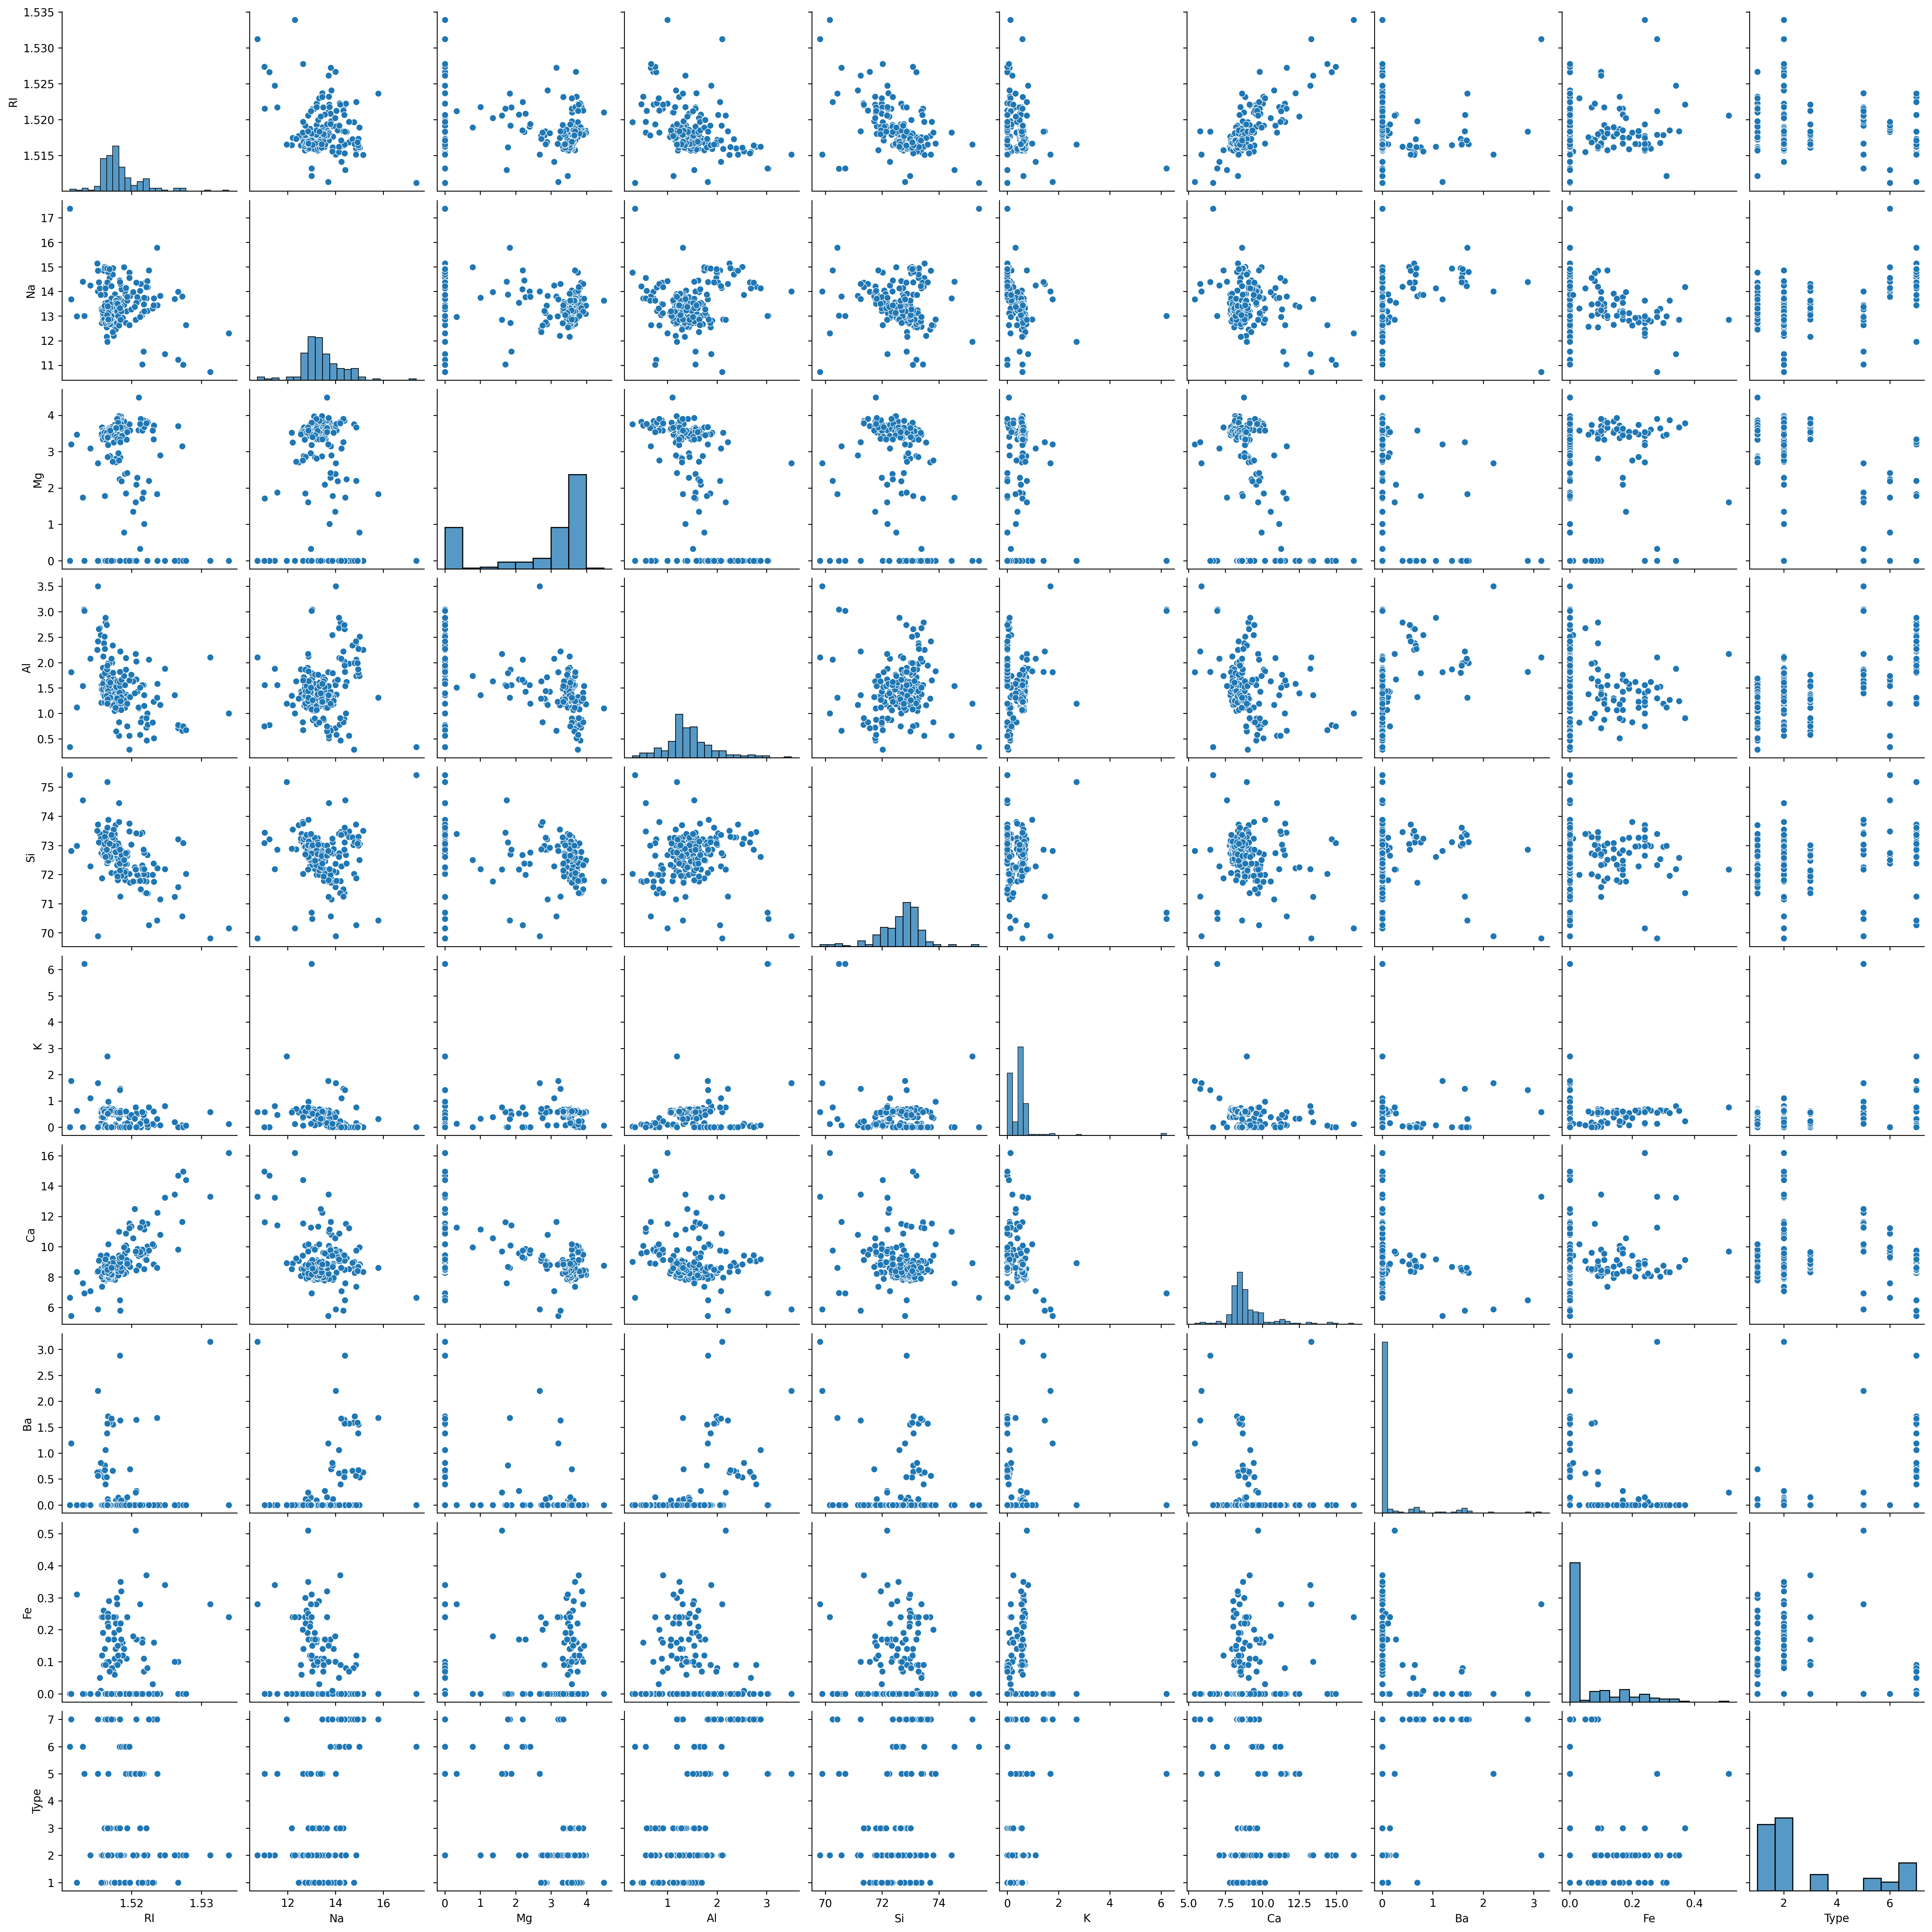

In [20]:
sns.pairplot(df)

<Axes: >

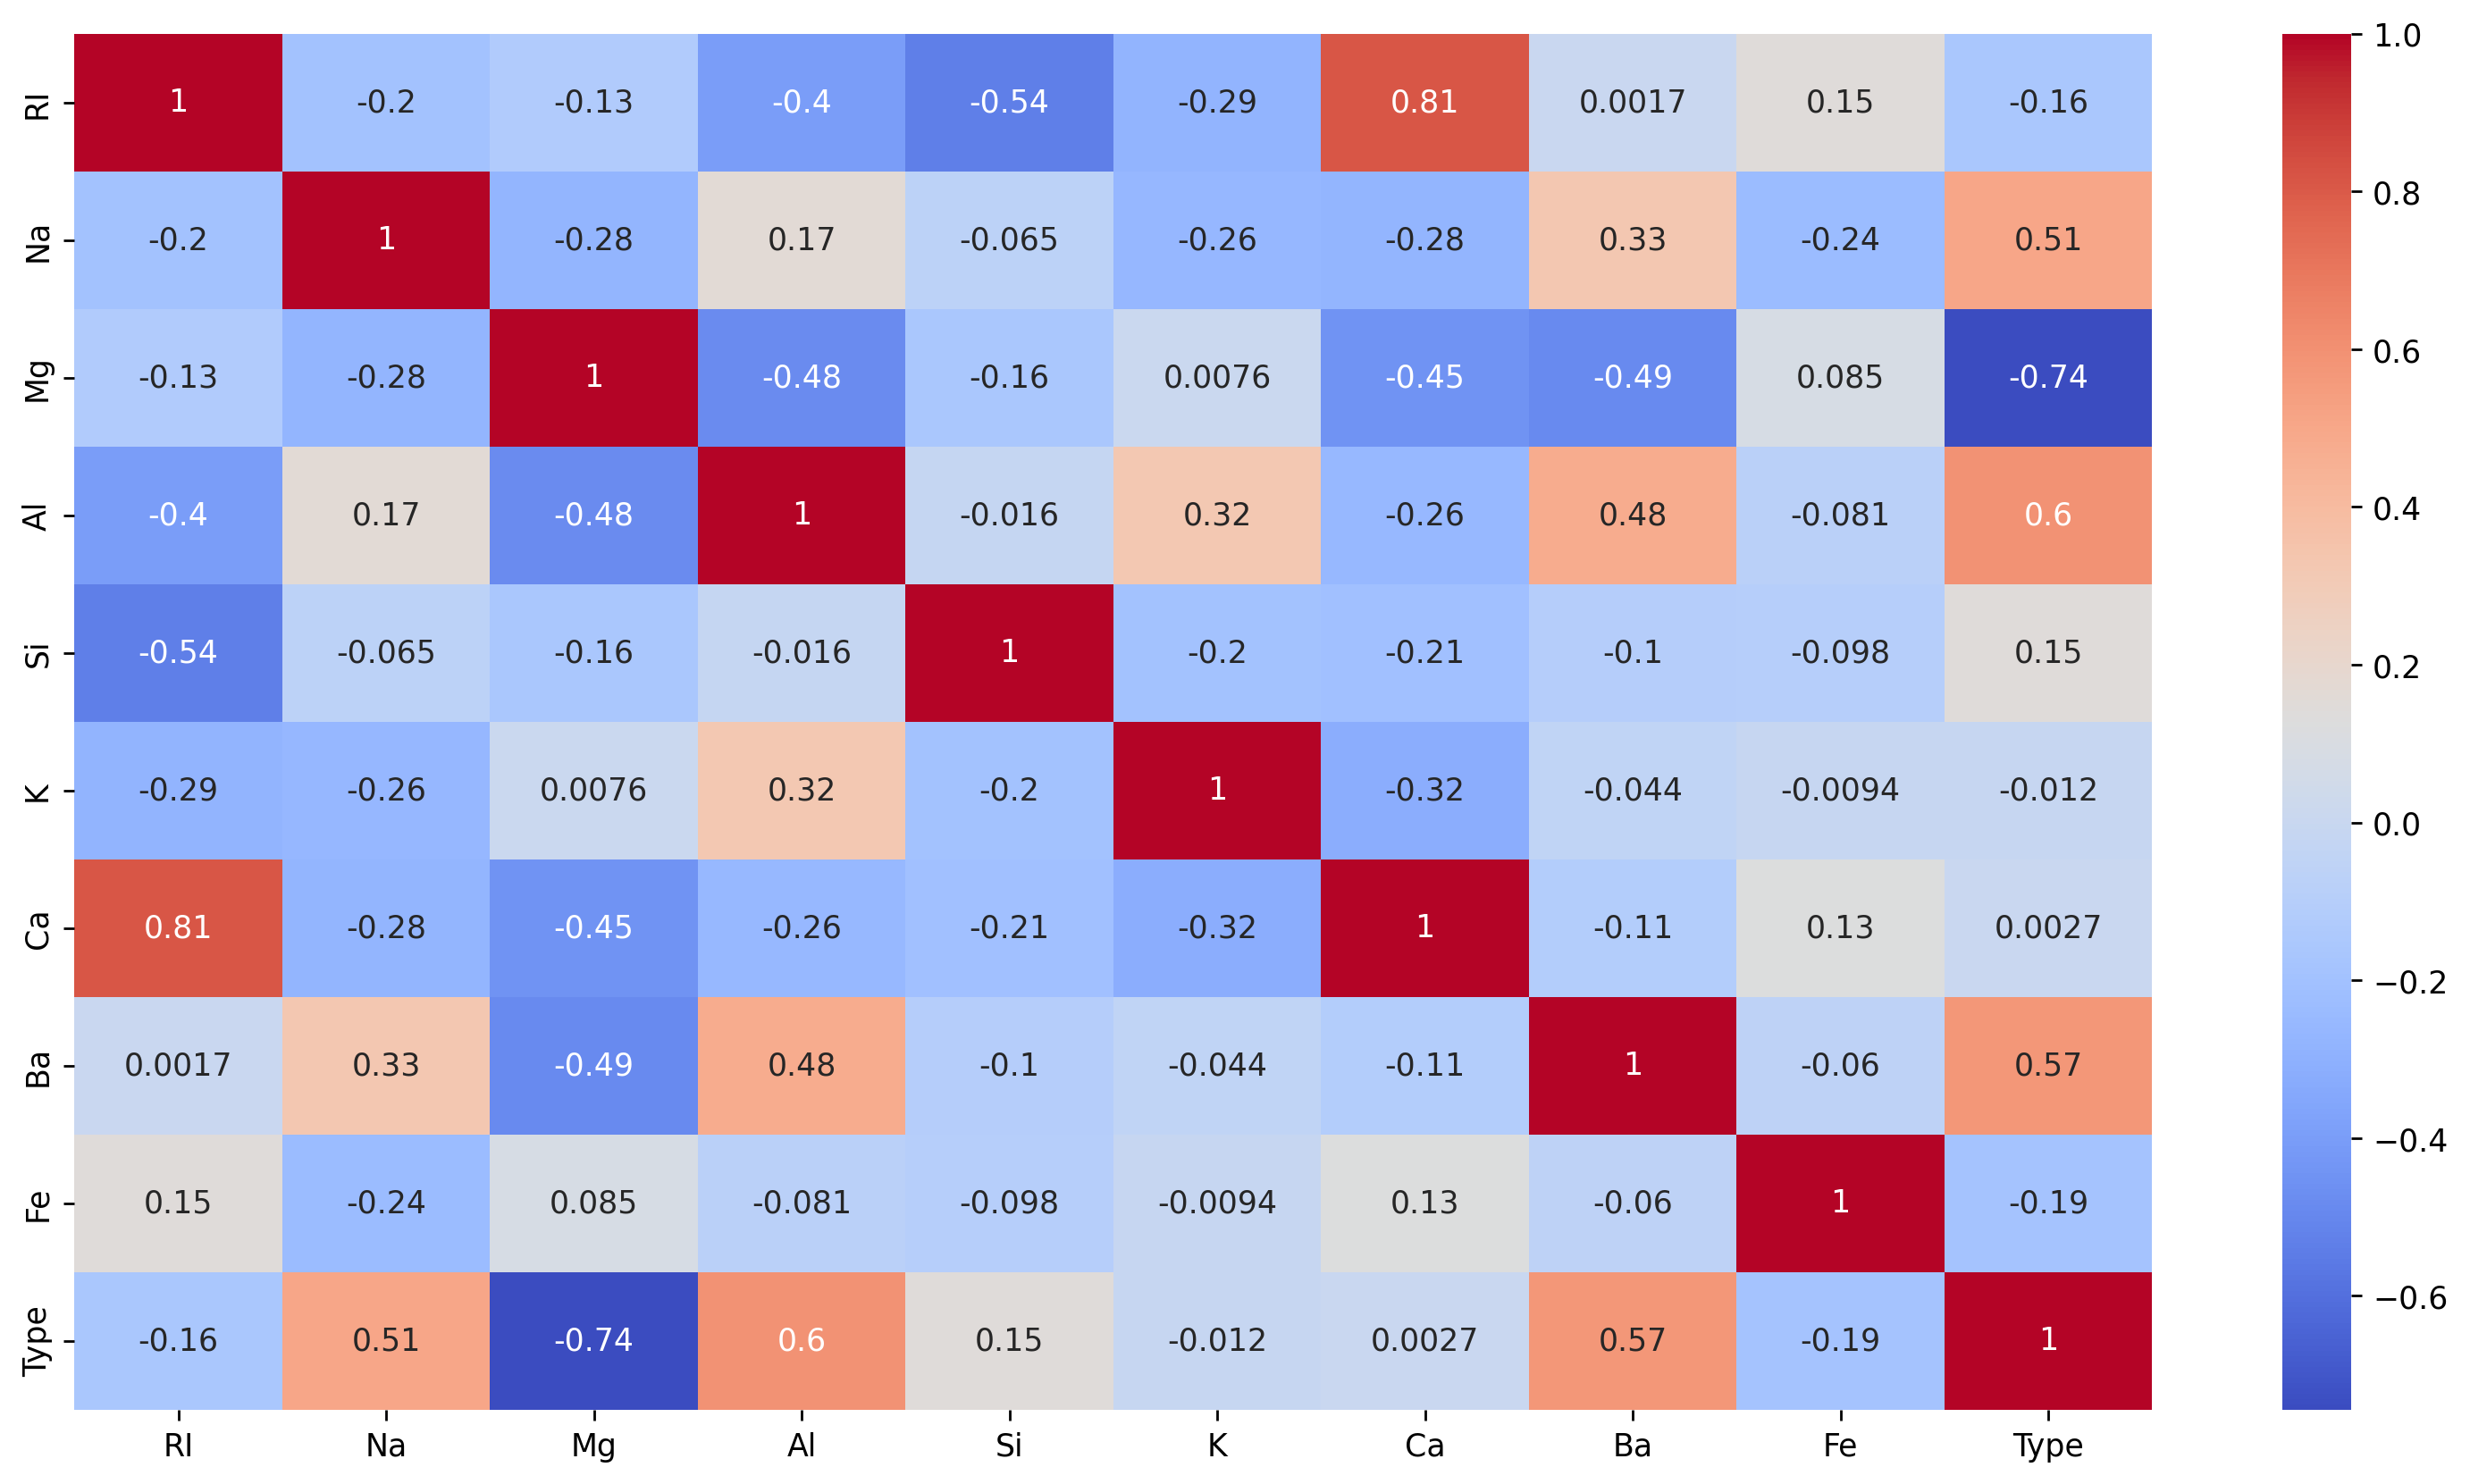

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Detection and Removal of Outliers

- Replace outliers with extreme values if we want to preserve data loss without removing entire row data

In [22]:
def replace_outliers_extremes(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1

    upper = q3 + (iqr * 1.5)
    lower = q1 - (iqr * 1.5)

    df[col].mask(df[col] > upper, upper, inplace = True)
    df[col].mask(df[col] < lower, lower, inplace = True)

In [23]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1

    upper = q3 + (iqr * 1.5)
    lower = q1 - (iqr * 1.5)

    df = df[(df[col] > lower) & (df[col] < upper)]

    return df

In [24]:
lost_data_percent()

Lost data percent  0.0


### Replacing outlier in RI column

In [25]:
import plotly.express as pe

In [26]:
pe.box(df['RI'], orientation = 'h')

In [27]:
replace_outliers_extremes(df, 'RI')

### Removing Na outliers

In [28]:
pe.box(df['Na'], orientation='h')

In [29]:
df = remove_outliers(df, 'Na')

In [30]:
lost_data_percent()

Lost data percent  3.29


### Replace Al and Mg columns

In [31]:
pe.box(df['Al'], orientation='h')

In [32]:
pe.box(df['Mg'], orientation='h')

In [33]:
replace_outliers_extremes(df, 'Al')
replace_outliers_extremes(df, 'Mg')

### Remove outliers from Si and K

In [34]:
pe.box(df['Si'], orientation='h')

In [35]:
pe.box(df['K'], orientation='h')

In [36]:
df = remove_outliers(df, 'Si')
df = remove_outliers(df, 'K')

In [37]:
pe.box(df['Si'], orientation='h')

In [38]:
pe.box(df['K'], orientation='h')

In [39]:
lost_data_percent()

Lost data percent  9.39


### Replacing outliers in Ca

In [40]:
pe.box(df['Ca'], orientation='h')

In [41]:
replace_outliers_extremes(df, 'Ca')

In [42]:
df.reset_index(inplace=True)
df.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [43]:
df.drop(columns='index', inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49000,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60000,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55000,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69000,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62000,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
188,1.51623,14.14,0.57625,2.29,72.61,0.08,9.18,1.06,0.0,7
189,1.51685,14.92,0.57625,1.99,73.06,0.00,8.40,1.59,0.0,7
190,1.52065,14.36,0.57625,2.02,73.42,0.00,8.44,1.64,0.0,7
191,1.51651,14.38,0.57625,1.94,73.61,0.00,8.48,1.57,0.0,7


### Seperating Features(X) and Target(y)

In [44]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [45]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49000,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60000,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55000,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69000,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62000,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
188,1.51623,14.14,0.57625,2.29,72.61,0.08,9.18,1.06,0.0
189,1.51685,14.92,0.57625,1.99,73.06,0.00,8.40,1.59,0.0
190,1.52065,14.36,0.57625,2.02,73.42,0.00,8.44,1.64,0.0
191,1.51651,14.38,0.57625,1.94,73.61,0.00,8.48,1.57,0.0


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
188    7
189    7
190    7
191    7
192    7
Name: Type, Length: 193, dtype: int64

## Normalize the data

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [48]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.44559958,  0.34185078,  1.34058205, ..., -0.0161039 ,
        -0.34846761, -0.60842917],
       [-0.2192432 ,  0.72216666,  0.5741846 , ..., -1.34606153,
        -0.34846761, -0.60842917],
       [-0.91945649,  0.17451179,  0.53112856, ..., -1.41834184,
        -0.34846761, -0.60842917],
       ...,
       [ 1.26932211,  1.43716053, -2.02962923, ..., -0.4642418 ,
         4.11157959, -0.60842917],
       [-0.75786881,  1.4675858 , -2.02962923, ..., -0.40641755,
         3.92121172, -0.60842917],
       [-0.46407302,  1.23939627, -2.02962923, ..., -0.2040327 ,
         4.19316582, -0.60842917]], shape=(193, 9))

In [49]:
X = pd.DataFrame(X_scaled, columns= X.columns)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.445600,0.341851,1.340582,-0.808043,-1.757861,-1.420997,-0.016104,-0.348468,-0.608429
1,-0.219243,0.722167,0.574185,-0.147874,0.031622,0.226165,-1.346062,-0.348468,-0.608429
2,-0.919456,0.174512,0.531129,0.309166,0.521375,-0.126799,-1.418342,-0.348468,-0.608429
3,-0.194760,-0.312293,0.651685,-0.325611,-0.194418,0.579128,-0.782275,-0.348468,-0.608429
4,-0.312279,-0.221017,0.591407,-0.452567,0.690905,0.500692,-0.999116,-0.348468,-0.608429
...,...,...,...,...,...,...,...,...,...
188,-0.894974,1.102483,-2.029629,2.213500,-0.194418,-1.342561,0.605507,2.534246,-0.608429
189,-0.591385,2.289068,-2.029629,1.451767,0.653232,-1.656306,-0.522066,3.975603,-0.608429
190,1.269322,1.437161,-2.029629,1.527940,1.331352,-1.656306,-0.464242,4.111580,-0.608429
191,-0.757869,1.467586,-2.029629,1.324811,1.689248,-1.656306,-0.406418,3.921212,-0.608429


In [50]:
# Using stratify=y to maintain class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Creating KNN Classifier with default values

In [51]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.82      0.72        17
           2       0.60      0.71      0.65        17
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.67        49
   macro avg       0.71      0.67      0.67        49
weighted avg       0.61      0.67      0.63        49



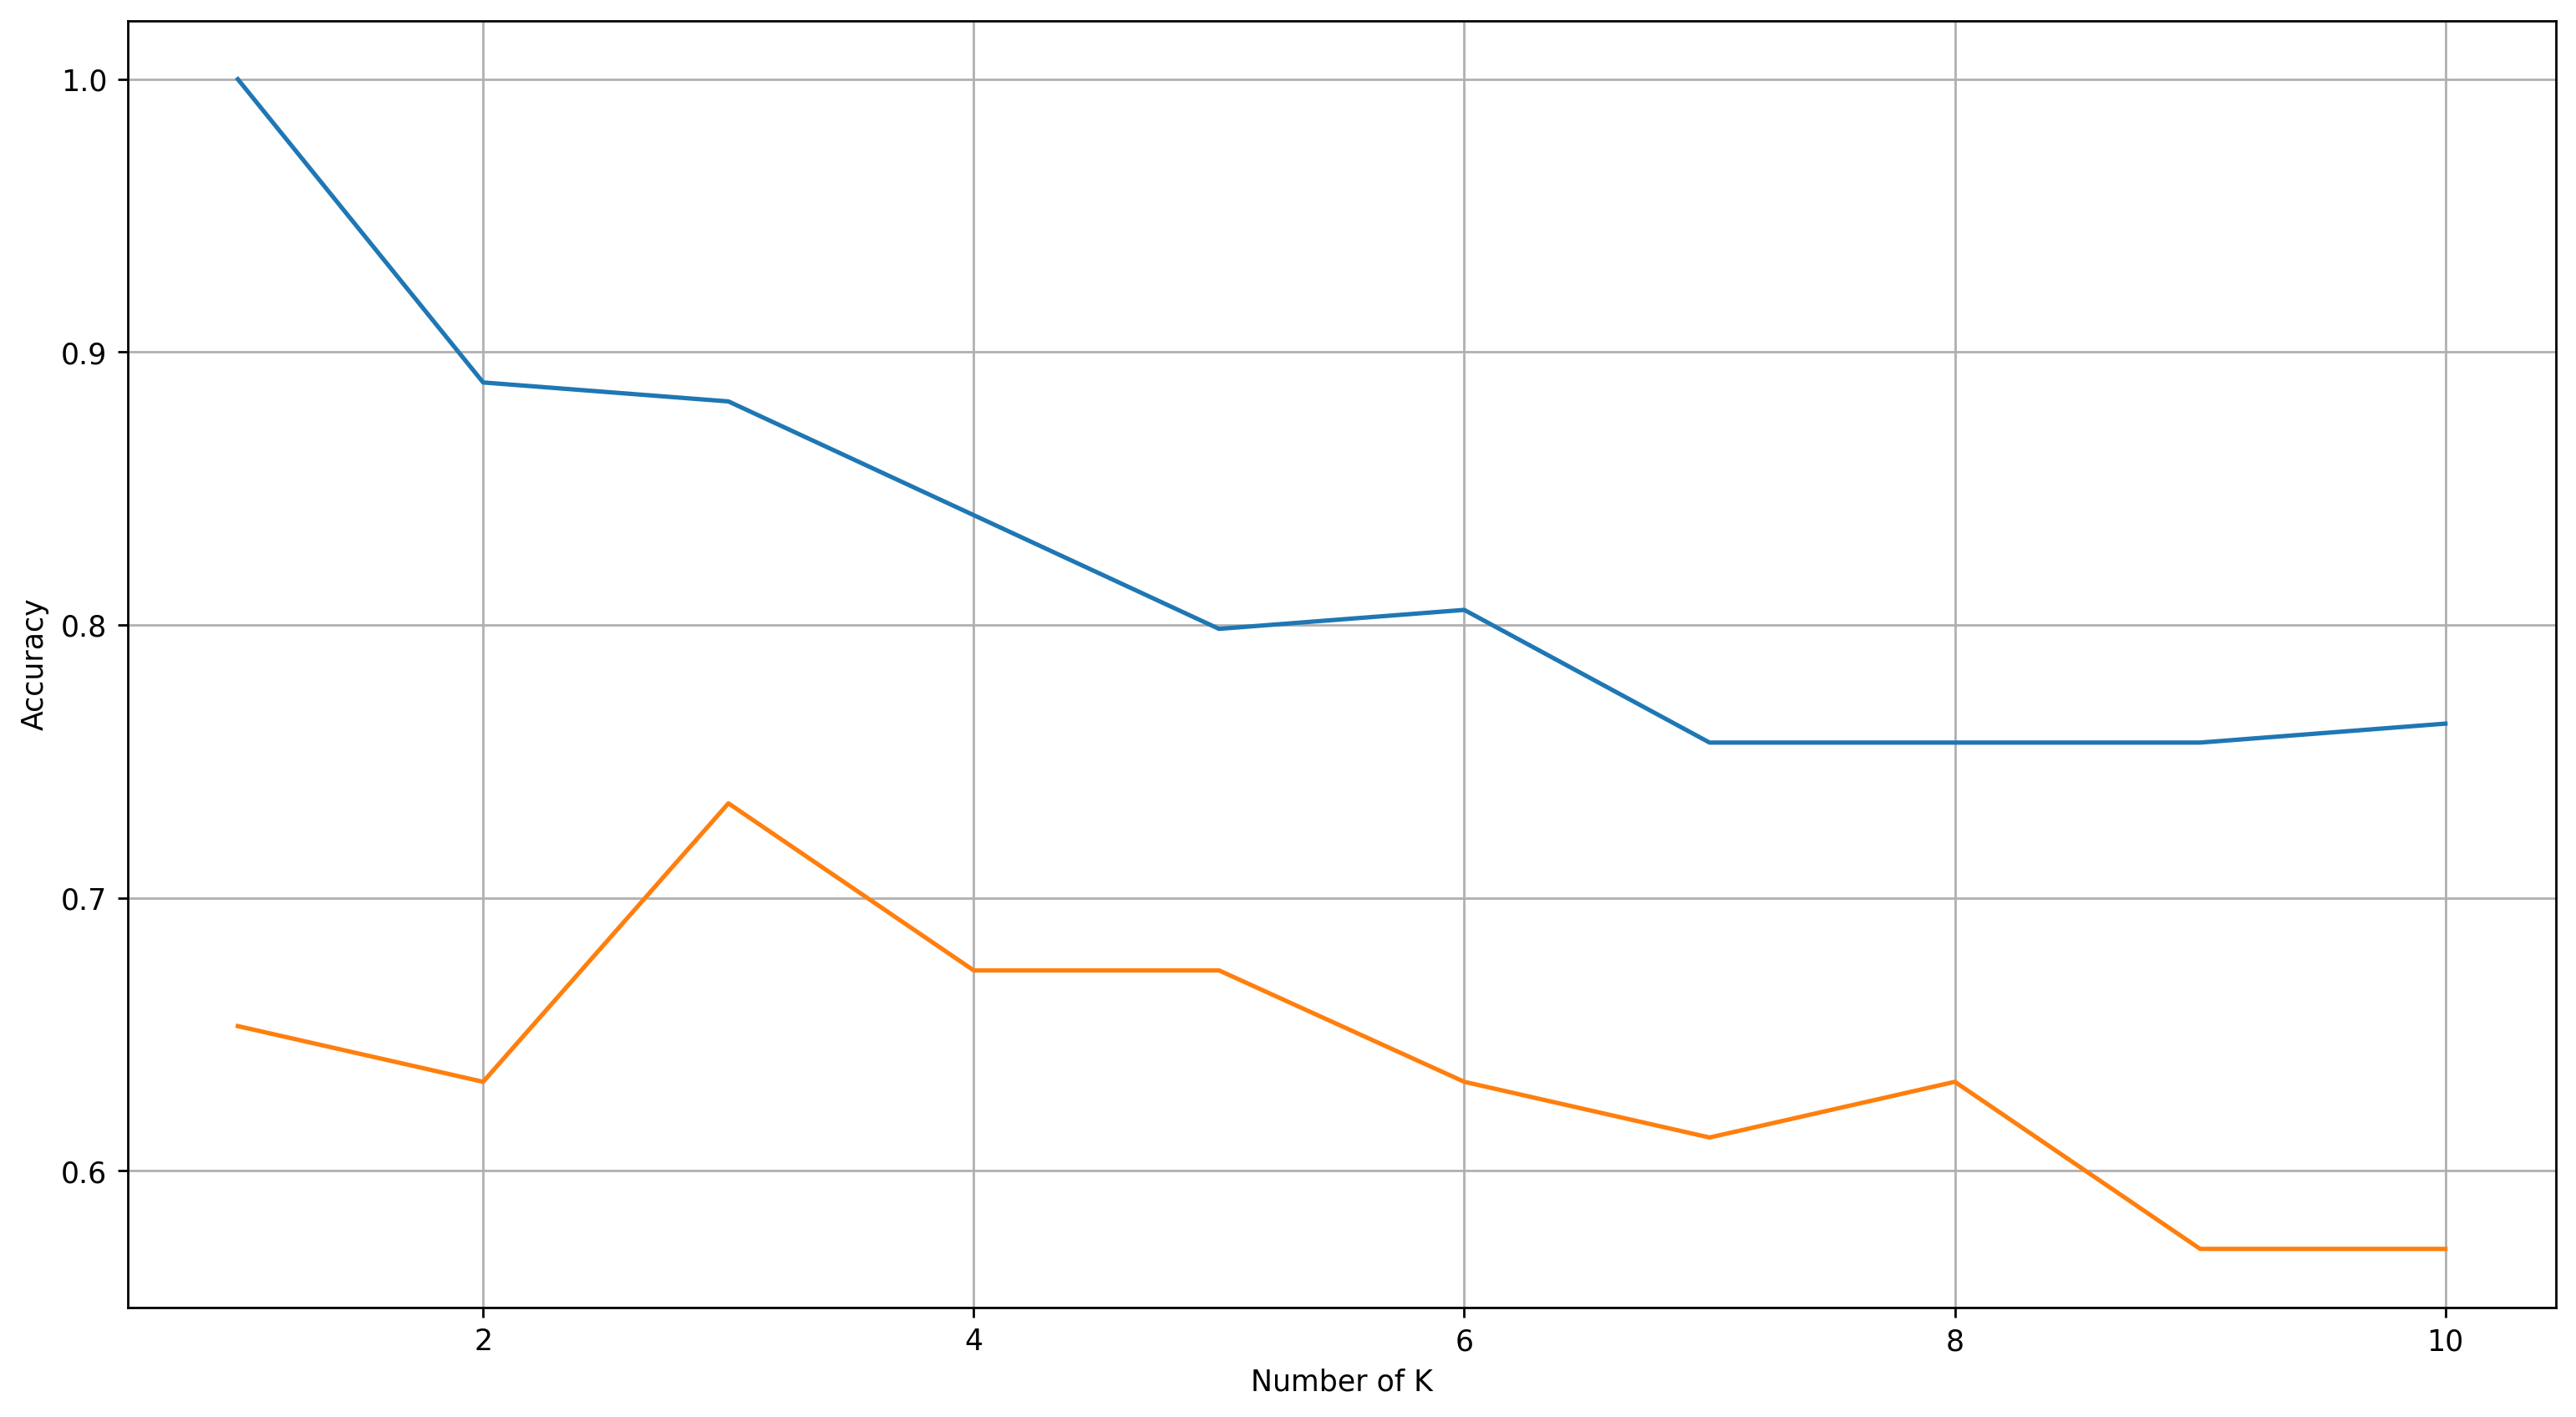

In [53]:
trainac = []
testac = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    
    trainac.append(knn.score(X_train,y_train))
    testac.append(knn.score(X_test,y_test))

plt.title('')
plt.plot(range(1,11),trainac)
plt.plot(range(1,11), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [54]:
## Cross-Validation

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Cross-Validation for Hyperparameter Tuning
Compare different K values using cross-validation

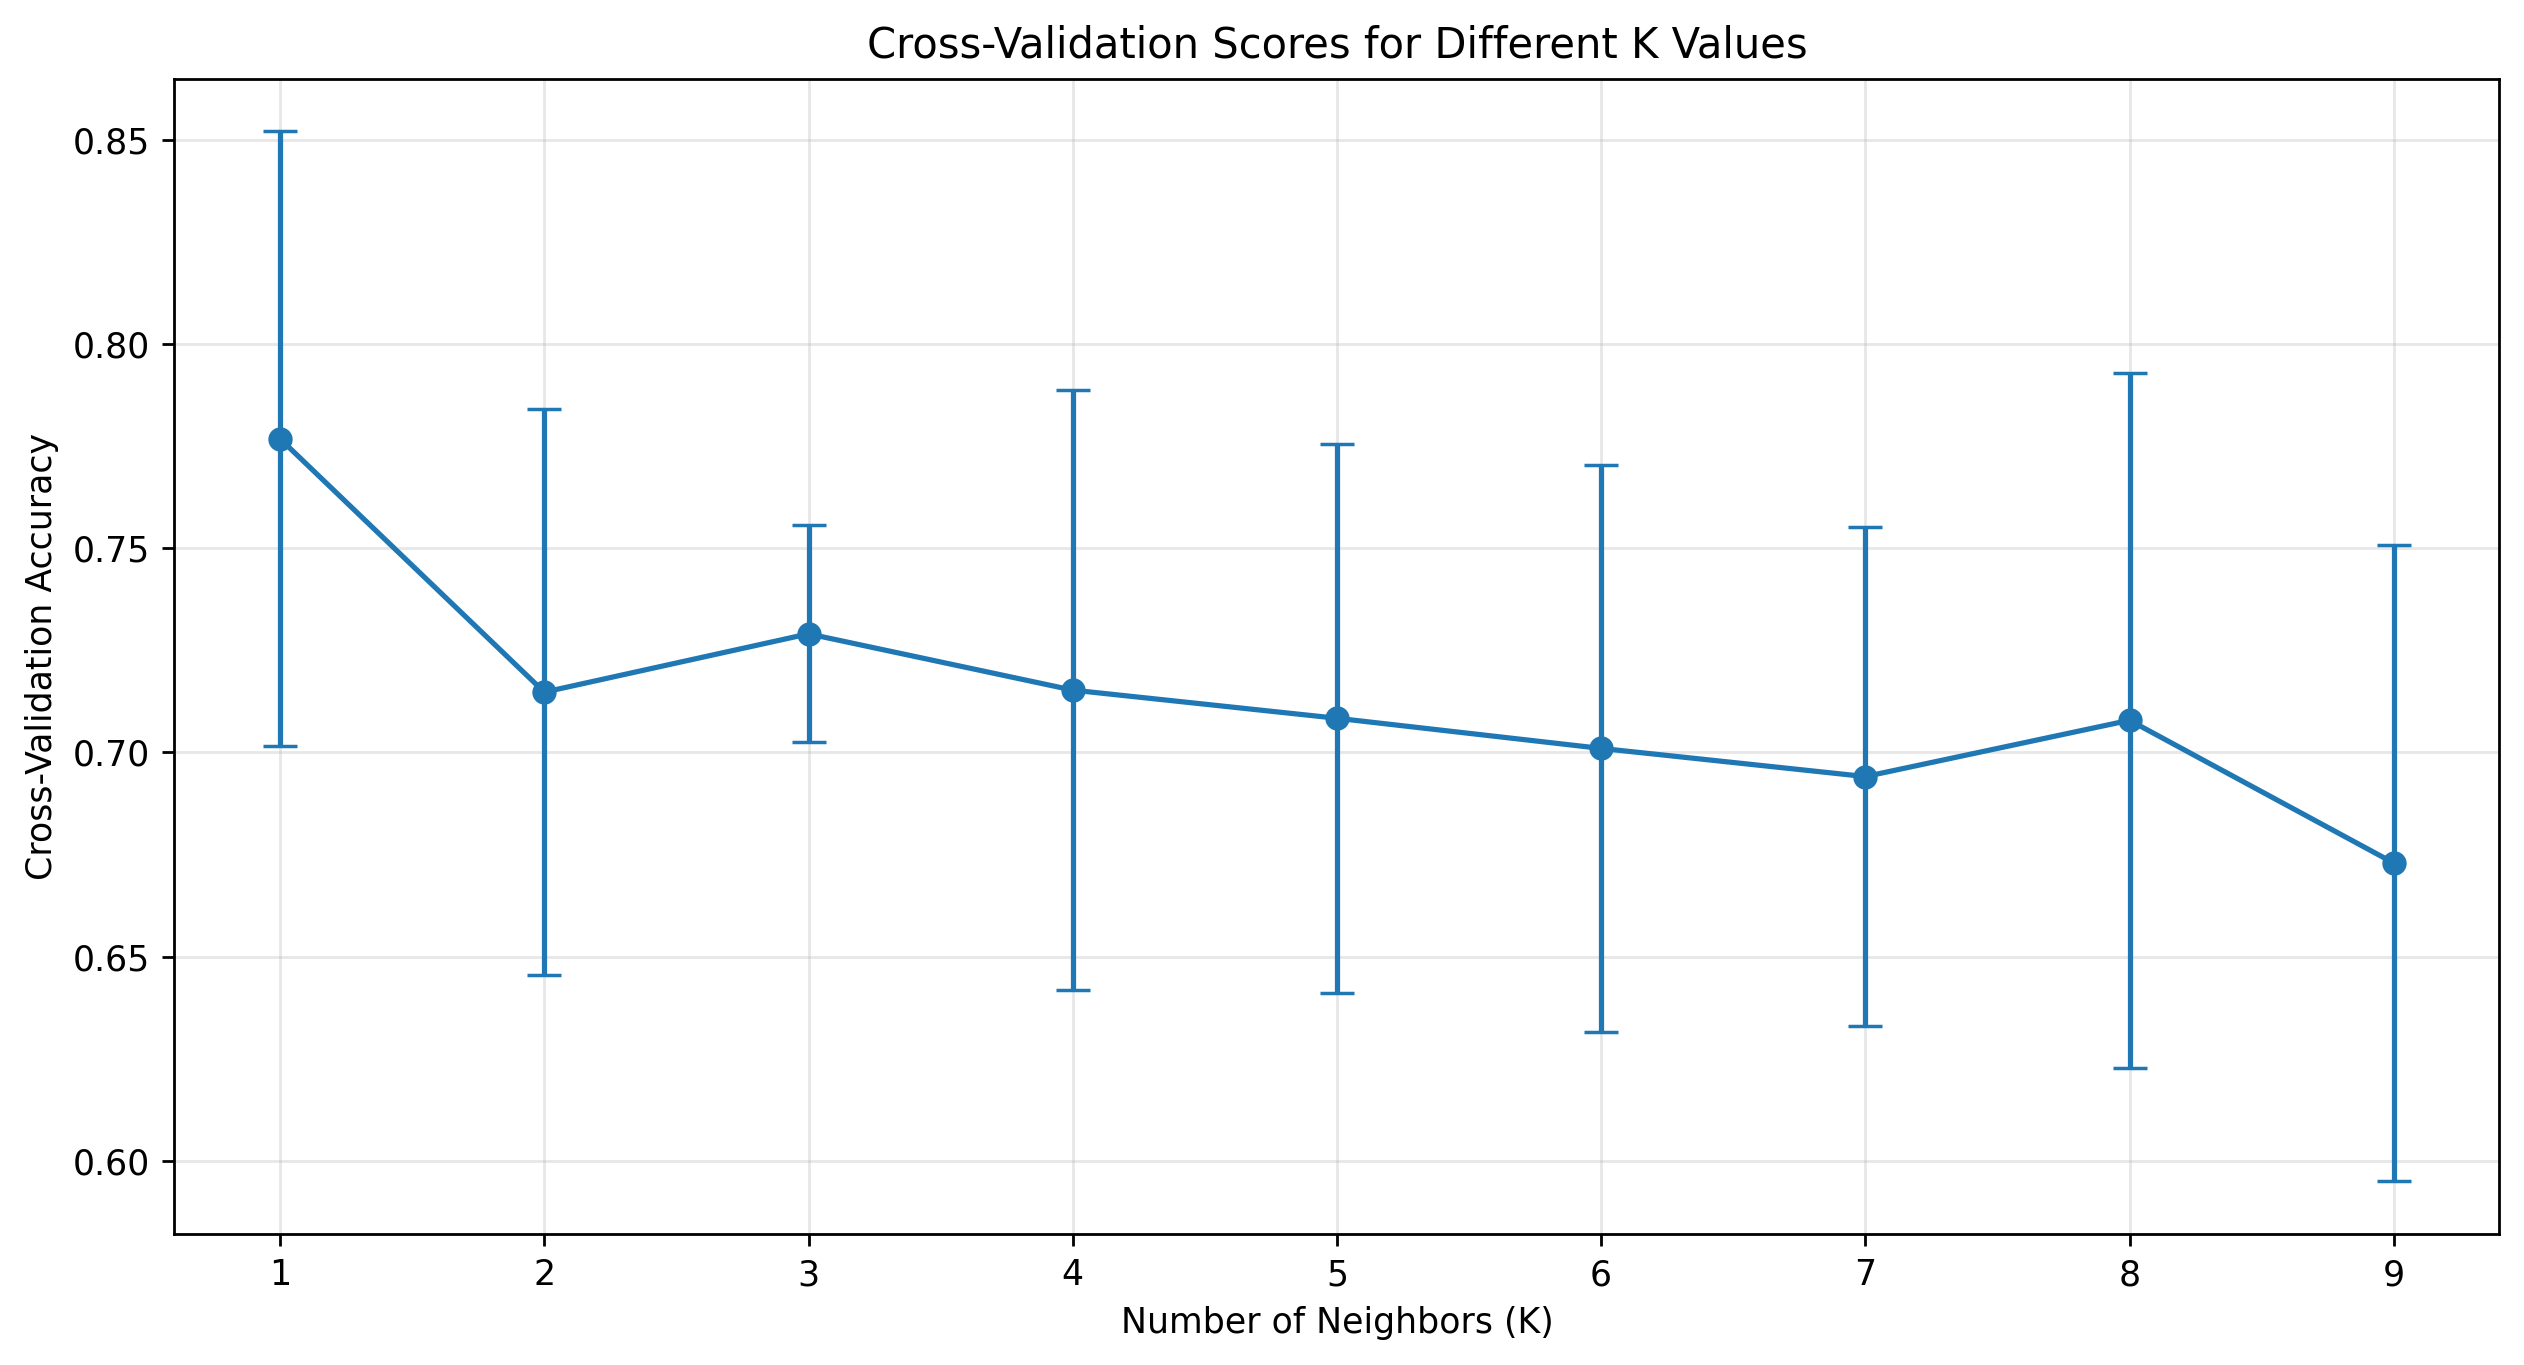

Best K value from CV: 1
Best CV Score: 0.777


In [56]:
# Cross-validation for different K values
k_values = range(1, 10)
cv_mean_scores = []
cv_std_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_scores.append(cv_scores.mean())
    cv_std_scores.append(cv_scores.std())

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(k_values, cv_mean_scores, yerr=cv_std_scores, marker='o', capsize=5)
plt.title('Cross-Validation Scores for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

# Find best K value
best_k = k_values[np.argmax(cv_mean_scores)]
best_score = max(cv_mean_scores)
print(f"Best K value from CV: {best_k}")
print(f"Best CV Score: {best_score:.3f}")

In [57]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
test_accuracy = final_model.score(X_test, y_test)
train_accuracy = final_model.score(X_train, y_train)
print(f'Train accuracy : {train_accuracy}')
print(f'Test accuracy : {test_accuracy}')

Train accuracy : 1.0
Test accuracy : 0.6530612244897959


<b>If you do same tuning with train_test_split() having random state as 1 you even get better results </b>  

But every time you findout which random state is better so instead use 
stratify parameter  <b> especially when using small datasets</b>  

ex : # Using stratify=y to maintain class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [58]:
k_values = range(1, 10)
cv_mean_scores = []
cv_std_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                random_state=1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_scores.append(cv_scores.mean())
    cv_std_scores.append(cv_scores.std())

best_k = k_values[np.argmax(cv_mean_scores)]
best_score = max(cv_mean_scores)
print(f"Best K value from CV: {best_k}")
print(f"Best CV Score: {best_score:.3f}")

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
test_accuracy = final_model.score(X_test, y_test)
train_accuracy = final_model.score(X_train, y_train)
print(f'Train accuracy : {train_accuracy}')
print(f'Test accuracy : {test_accuracy}')

Best K value from CV: 1
Best CV Score: 0.729
Train accuracy : 1.0
Test accuracy : 0.8367346938775511


### Why This Happens:
1. **Different Data Splits**: Each random state creates a different train-test split
2. **Sample Variation**: Some splits may be "easier" or "harder" to predict
3. **Class Distribution**: Different splits may have varying class distributions
4. **Small Dataset Effect**: Smaller datasets are more sensitive to split variations

In [59]:
# Doing same with stratify parameter
random_states = [1, 42, 123, 456, 789]
results = []

print("Random State | Train Acc | Test Acc | Difference")
print("-" * 45)

for rs in random_states:
    # Split data with different random state
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X, y, test_size=0.25, random_state=rs, stratify=y
    )
    
    k_values = range(1, 10)
    cv_mean_scores = []
    cv_std_scores = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean_scores.append(cv_scores.mean())
        cv_std_scores.append(cv_scores.std())

    best_k = k_values[np.argmax(cv_mean_scores)]
    best_score = max(cv_mean_scores)

    # Train model with best K from CV
    model_temp = KNeighborsClassifier(n_neighbors=best_k)    
    model_temp.fit(X_train_temp, y_train_temp)
    
    train_acc = model_temp.score(X_train_temp, y_train_temp)
    test_acc = model_temp.score(X_test_temp, y_test_temp)
    diff = abs(train_acc - test_acc)
    
    results.append({
        'random_state': rs,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'difference': diff
    })
    
    print(f"{rs:11} | {train_acc:.3f}     | {test_acc:.3f}    | {diff:.3f}")

# Find best random state
best_result = max(results, key=lambda x: x['test_acc'])
print(f"\nBest random state: {best_result['random_state']} with test accuracy: {best_result['test_acc']:.3f}")

Random State | Train Acc | Test Acc | Difference
---------------------------------------------
          1 | 1.000     | 0.673    | 0.327
         42 | 1.000     | 0.735    | 0.265
        123 | 1.000     | 0.755    | 0.245
        456 | 1.000     | 0.673    | 0.327
        789 | 1.000     | 0.755    | 0.245

Best random state: 123 with test accuracy: 0.755


<b> Now if you observe random state 42 is also giving better test accuracy</b>

In [60]:
# Using stratify=y to maintain class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### 1. cross_val_score()
**Purpose**: Simple, quick cross-validation with a single metric
**What it does**: 
- Splits data automatically
- Trains and evaluates model
- Returns array of scores for each fold
- **Default**: Uses StratifiedKFold for classification, KFold for regression

In [61]:
# Example of cross_val_score
print("=== 1. cross_val_score() ===")
model_example = KNeighborsClassifier(n_neighbors=3)

# Simple usage - default behavior
cv_scores = cross_val_score(model_example, X_train, y_train, cv=5)
print(f"Scores: {cv_scores}")
print(f"Mean: {cv_scores.mean():.3f}")
print(f"Std: {cv_scores.std():.3f}")

# With specific scoring metric
cv_scores_acc = cross_val_score(model_example, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy scores: {cv_scores_acc}")

=== 1. cross_val_score() ===
Scores: [0.86206897 0.75862069 0.55172414 0.68965517 0.85714286]
Mean: 0.744
Std: 0.116
Accuracy scores: [0.86206897 0.75862069 0.55172414 0.68965517 0.85714286]


### 2. StratifiedKFold
**Purpose**: Cross-validation strategy/splitter that maintains class distribution
**What it does**:
- Creates folds with balanced class distribution
- Returns train/test indices for each fold
- **You control** the training and evaluation process
- Can be used with other CV functions

In [62]:
# Example of StratifiedKFold
print("\n=== 2. StratifiedKFold ===")

# Create the splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Manual cross-validation with more control
train_scores_manual = []
test_scores_manual = []

print("Fold-by-fold results:")
for fold, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train), 1):
    # Get the train/test data for this fold
    X_train_fold = X_train.iloc[train_idx]
    X_test_fold = X_train.iloc[test_idx]
    y_train_fold = y_train.iloc[train_idx]
    y_test_fold = y_train.iloc[test_idx]
    
    # Train model
    model_example.fit(X_train_fold, y_train_fold)
    
    # Evaluate
    train_score = model_example.score(X_train_fold, y_train_fold)
    test_score = model_example.score(X_test_fold, y_test_fold)
    
    train_scores_manual.append(train_score)
    test_scores_manual.append(test_score)
    
    print(f"Fold {fold}: Train={train_score:.3f}, Test={test_score:.3f}")

print(f"\nOverall: Train={np.mean(train_scores_manual):.3f}, Test={np.mean(test_scores_manual):.3f}")


=== 2. StratifiedKFold ===
Fold-by-fold results:
Fold 1: Train=0.861, Test=0.586
Fold 2: Train=0.870, Test=0.690
Fold 3: Train=0.852, Test=0.724
Fold 4: Train=0.870, Test=0.586
Fold 5: Train=0.853, Test=0.786

Overall: Train=0.861, Test=0.674


### 3. cross_validate()
**Purpose**: Comprehensive cross-validation with multiple metrics and timing
**What it does**:
- Returns multiple metrics in one call
- Provides fit/score times
- Can return train scores
- More detailed output than cross_val_score

In [63]:
# Example of cross_validate
print("\n=== 3. cross_validate() ===")

# Multiple metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# With return_train_score to get train performance too
cv_results = cross_validate(
    model_example, X_train, y_train, 
    cv=5, 
    scoring=scoring, 
    return_train_score=True,
    return_estimator=False  # Can return trained models if needed
)

# print("Available keys in results:")
# for key in cv_results.keys():
#     print(f"  {key}")

print("\nDetailed Results:")
for metric in scoring:
    test_scores = cv_results[f'test_{metric}']
    train_scores = cv_results[f'train_{metric}']
    print(f"{metric.upper()}:")
    print(f"  Test:  {test_scores.mean():.3f} ± {test_scores.std():.3f}")
    print(f"  Train: {train_scores.mean():.3f} ± {train_scores.std():.3f}")

print(f"\nTiming:")
print(f"Fit time: {cv_results['fit_time'].mean():.4f}s ± {cv_results['fit_time'].std():.4f}s")
print(f"Score time: {cv_results['score_time'].mean():.4f}s ± {cv_results['score_time'].std():.4f}s")


=== 3. cross_validate() ===

Detailed Results:
ACCURACY:
  Test:  0.744 ± 0.116
  Train: 0.861 ± 0.015
PRECISION_MACRO:
  Test:  0.748 ± 0.154
  Train: 0.907 ± 0.017
RECALL_MACRO:
  Test:  0.732 ± 0.124
  Train: 0.836 ± 0.036
F1_MACRO:
  Test:  0.722 ± 0.134
  Train: 0.856 ± 0.031

Timing:
Fit time: 0.0012s ± 0.0004s
Score time: 0.0064s ± 0.0004s


## When to Choose Each Method

### 🎯 **Choose cross_val_score() when:**
- You need quick model evaluation
- Only one metric is important (usually accuracy)
- Simple comparison between models
- Getting started with cross-validation
- **Example**: Comparing different K values in KNN

### 🔧 **Choose StratifiedKFold when:**
- You need full control over the CV process
- Want to implement custom evaluation logic
- Need to track both train and test performance manually
- Want to save/analyze individual fold predictions
- Building custom CV pipelines
- **Example**: Custom feature selection in each fold

### 📊 **Choose cross_validate() when:**
- Need comprehensive model evaluation
- Want multiple metrics simultaneously
- Interested in timing information
- Want both train and test scores
- Comparing complex models
- **Example**: Model selection with multiple criteria

### Recommendation: Update Your Split to Use Stratification
Let's update your original train-test split to use stratification

### DECISION GUIDE:

🎯 Use cross_val_score() when:
   - Quick hyperparameter tuning (like your K selection)
   - Simple model comparison
   - Only need one metric (accuracy)
   - Getting started with CV

🔧 Use StratifiedKFold when:
   - Need full control over CV process
   - Custom preprocessing per fold
   - Want to analyze individual folds
   - Building complex ML pipelines

📊 Use cross_validate() when:
   - Need multiple metrics simultaneously
   - Want comprehensive model evaluation
   - Interested in timing performance
   - Final model assessment

💡 For your Glass Classification project:
   - cross_val_score() → K-value selection (current approach ✓)
   - cross_validate() → Final model evaluation
   - StratifiedKFold → If you need custom analysis